In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
# 1. Load the digits dataset
digits = load_digits()

In [16]:
#Get the attributes availalbe in this dataset
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [19]:
# Data and labels
X = digits.data       # Feature matrix (images flattened to 64 features)
Y = digits.target     # Target labels (0 to 9)

In [20]:
# 2. Display basic dataset info
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(Y))}")

Dataset shape: (1797, 64)
Number of classes: 10


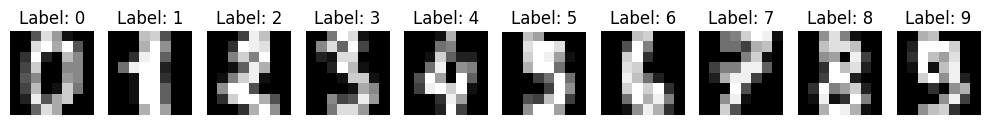

In [21]:
# 3. Visualize the first 10 images
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {Y[i]}')
    ax.axis('off')
    
plt.tight_layout()
plt.show()

In [22]:
# Optional: Create a DataFrame for visualization
df = pd.DataFrame(X, columns=[f'pixel_{i}' for i in range(X.shape[1])])
df['label'] = y

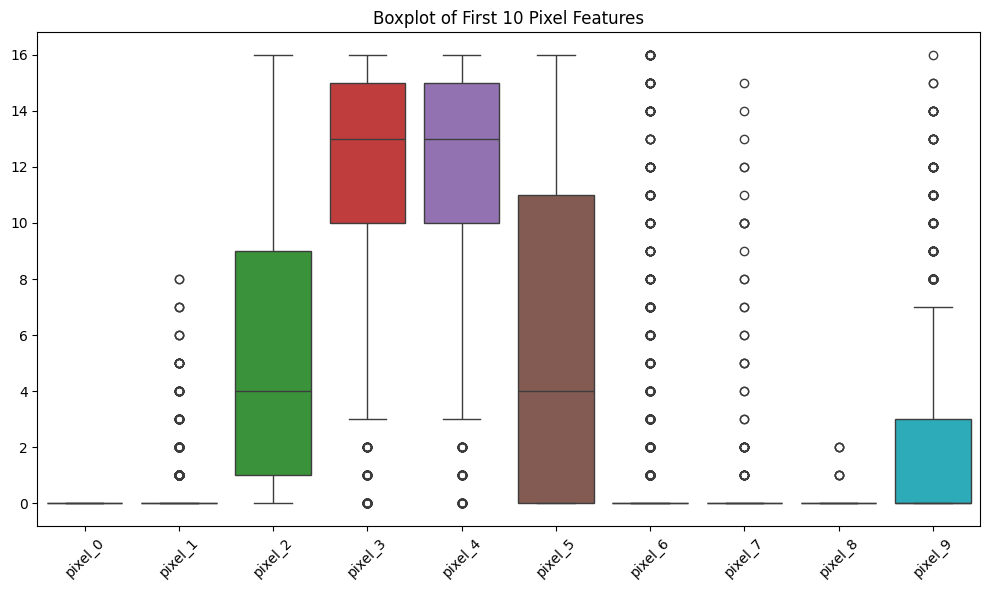

In [23]:
# Plot only first few features to avoid clutter (digits has 64 features)
# digits has 64 features (8x8 image pixels), so a pairplot would be cluttered.
# We visualize a boxplot of the first 10 pixel features instead.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, :10])
plt.title('Boxplot of First 10 Pixel Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# 4. Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
# 5. Train a Support Vector Classifier
model = SVC(gamma=0.001)  # gamma controls influence of training samples
model.fit(X_train, Y_train)

SVC(gamma=0.001)

In [26]:
# 6. Predict and evaluate
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")


Model Accuracy: 0.99


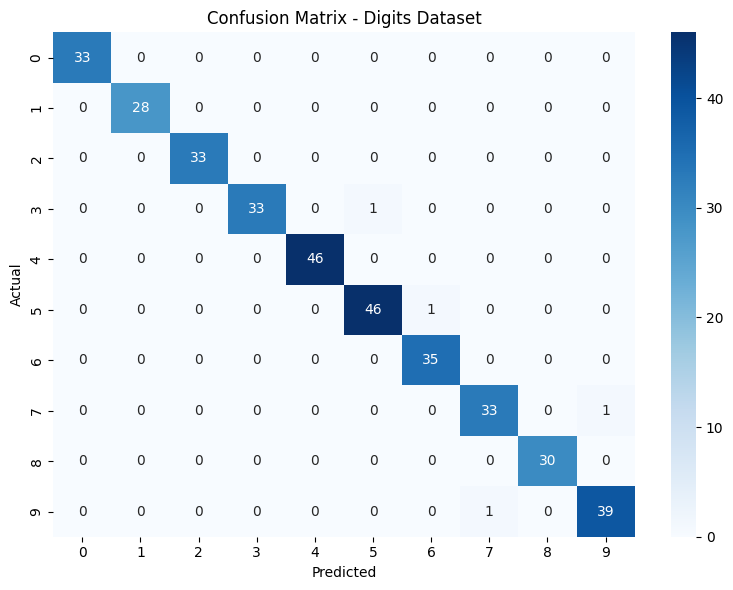

In [27]:
# 7. Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Digits Dataset')
plt.tight_layout()
plt.show()